# Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

# Personal Finance Planner

### Collect Crypto Prices Using the requests Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

* In order to perform portfolio analysis, all portfolio assests need to be expressed in the same currency. While the homework instructions requested to fetch the Crypto asset prices in CAD, the SPY and AGG prices in Alpaca are only available in USD. I will therefore use the USD prices of Crypto assets in my analysis.

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
crypto = my_btc_value + my_eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your Crypto is ${crypto:0.2f}")

The current value of your 1.2 BTC is $70737.60
The current value of your 5.3 ETH is $9714.90
The current value of your Crypto is $80452.50


# Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [10]:
# Compute the current USD value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
shares = my_spy_value + my_agg_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your Shares is ${shares:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00
The current value of your Shares is $42175.00


# Savings Health Analysis
* I am making an assumption that the income is expressed in the US dollars since I am analysing the investment account whose values are expressed in the USD.

In [11]:
# Set monthly household income (in the USD)
monthly_income = 12000

# Create savings DataFrame
investments_data = {"AMOUNT": [crypto, shares]}
investments = ["CRYPTO", "SHARES"]

# Create Savings DataFrame with `investments` as index
df_savings = pd.DataFrame(investments_data, index=investments)

# Display Savings data
df_savings

,AMOUNT
CRYPTO,80452.5
SHARES,42175.0


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='AMOUNT'>

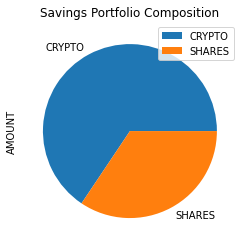

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="AMOUNT", title="Savings Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

print(f"The emergency fund needed is ${emergency_fund:0.2f}")

# Calculate total amount of savings
current_total_savings=crypto+shares
print(f"The current total savings are ${current_total_savings:0.2f}")

# Compare the Total Savings amount to the amount of the required Emergency Fund
# Validate saving health
if current_total_savings > emergency_fund:
    print(f"Congratulations! Your emergency fund in good shape and you have a surplas of ${(current_total_savings-emergency_fund):0.2f}")
elif current_total_savings == emergency_fund:
    print(f"Congratulations! Your have reached your financial goal and your emegency funds meets your minimum requirement of ${(emergency_fund):0.2f}")
else: 
    print(f"Keep up the good work! You are ${(emergency_fund-current_total_savings):0.2f} away from reaching your emergency fund goal of ${(emergency_fund):0.2f}")


The emergency fund needed is $36000.00
The current total savings are $122627.50
Congratulations! Your emergency fund in good shape and you have a surplas of $86627.50


# Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  256921808  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.18  248430643  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  286308782  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  268298876  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  203576470

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# The weights of the portfolio are set at 40% for Bonds (AGG) and 60% for Stocks
MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Print the simulation input data
MC.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.18   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  256921808          NaN  
2020-03-19 00:00:00-04:00  248430643     0.000705  
2020-03-20 00:00:00-04:00  286308782    -0.050750  
2020-03-23 00:00:00-04:00  268298876    -0.028086  
2020-03-24 00:00:00-04:00  203576470     0.094737

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.768874e-01,1.000845e+00,1.022399e+00,1.022530e+00,1.001905e+00,1.005866e+00,1.006890e+00,9.859167e-01,9.897739e-01,9.993787e-01,...,1.004704e+00,9.953967e-01,1.010010e+00,9.955366e-01,1.020784e+00,1.015225e+00,9.982918e-01,9.990027e-01,1.003288e+00,9.896401e-01
2,9.913177e-01,1.019302e+00,1.014229e+00,1.003217e+00,1.001539e+00,9.882244e-01,1.019773e+00,9.877553e-01,1.007794e+00,9.873290e-01,...,1.025639e+00,1.004202e+00,1.014453e+00,1.002781e+00,1.034355e+00,1.033384e+00,9.939311e-01,1.013121e+00,1.008068e+00,9.865924e-01
3,9.945396e-01,1.013307e+00,1.008707e+00,9.940400e-01,1.010974e+00,9.579803e-01,1.023341e+00,1.013549e+00,1.015758e+00,1.001934e+00,...,1.032834e+00,1.004232e+00,1.019587e+00,1.017735e+00,1.046114e+00,1.050394e+00,9.773889e-01,1.010429e+00,1.032683e+00,9.978959e-01
4,1.006853e+00,1.018621e+00,1.013757e+00,1.015917e+00,1.022539e+00,9.652246e-01,1.010784e+00,1.012737e+00,1.007106e+00,9.950303e-01,...,1.027367e+00,1.007519e+00,1.032322e+00,1.042124e+00,1.061515e+00,1.063073e+00,9.796127e-01,1.021226e+00,1.044794e+00,1.001036e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.893702e+07,2.380632e+07,2.637152e+08,1.060258e+08,1.114274e+08,3.335259e+08,5.044799e+07,2.377565e+08,1.666111e+09,9.604743e+08,...,7.942859e+07,9.060212e+07,1.195927e+08,1.064510e+08,2.274141e+08,3.453652e+08,2.373413e+07,8.745655e+08,2.033031e+07,2.912098e+08
7557,1.002914e+08,2.416366e+07,2.634908e+08,1.044787e+08,1.107358e+08,3.285391e+08,4.955986e+07,2.336227e+08,1.718643e+09,9.696295e+08,...,7.837571e+07,9.008047e+07,1.201070e+08,1.072246e+08,2.335131e+08,3.504634e+08,2.380287e+07,8.740140e+08,2.028652e+07,2.931612e+08
7558,9.950448e+07,2.428478e+07,2.633845e+08,1.063821e+08,1.093252e+08,3.267345e+08,4.920849e+07,2.339951e+08,1.703478e+09,9.726291e+08,...,7.696882e+07,9.062203e+07,1.199901e+08,1.079553e+08,2.308047e+08,3.476807e+08,2.413734e+07,8.651917e+08,2.001869e+07,3.016285e+08
7559,9.837506e+07,2.445384e+07,2.597686e+08,1.059716e+08,1.121754e+08,3.380810e+08,5.063626e+07,2.316155e+08,1.702919e+09,9.966747e+08,...,7.701823e+07,9.130696e+07,1.242140e+08,1.078284e+08,2.274332e+08,3.525886e+08,2.423652e+07,8.731704e+08,2.013858e+07,3.006388e+08


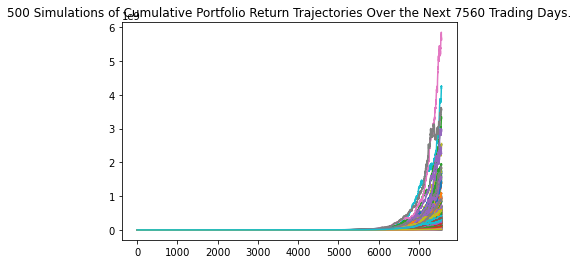

In [19]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

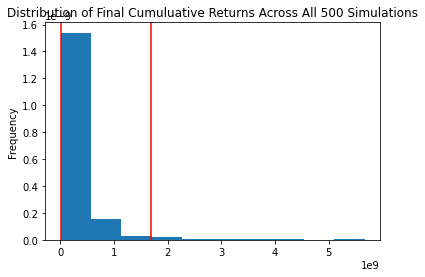

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

# Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           5.000000e+02
mean            3.214759e+08
std             5.150456e+08
min             7.153807e+06
25%             8.244808e+07
50%             1.683901e+08
75%             3.614862e+08
max             5.670715e+09
95% CI Lower    1.896030e+07
95% CI Upper    1.688249e+09
Name: 7560, dtype: float64


## Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(even_tbl[8]*initial_investment,2)
even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio")
print (f"over the next 30 years will end within in the range of")      
print (f"${even_ci_lower} and ${even_ci_upper}")  

There is a 95% chance that an initial investment of $20000 in the portfolio
over the next 30 years will end within in the range of
$379206031292.99 and $33764977768544.74


# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [23]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_lower_new = round(even_tbl[8]*initial_investment_new,2)
even_ci_upper_new = round(even_tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio")
print(f"over the next 30 years will end within in the range of")      
print(f"${even_ci_lower_new} and ${even_ci_upper_new}")  

There is a 95% chance that an initial investment of $30000.0 in the portfolio
over the next 30 years will end within in the range of
$568809046939.49 and $50647466652817.11


# Optional Challenge - Early Retirement

### Five years retirement option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015623,0.999217,1.015259,1.004617,0.988022,1.013191,1.015672,1.005220,0.997557,0.996669,...,1.002122,0.998469,0.986484,1.010812,1.005348,1.014196,1.011246,0.991433,1.019199,0.989807
2,1.035622,0.993026,1.009428,1.012459,1.002284,1.032983,1.024351,1.014764,1.001610,1.015468,...,0.994722,0.983925,0.979164,1.008640,0.998361,1.002369,1.016183,1.009093,1.024229,0.983311
3,1.051481,0.999862,0.995783,1.013088,1.005768,1.056696,1.005845,1.033221,0.977259,1.006066,...,1.004809,0.997168,0.957129,1.022624,1.022398,1.028941,1.020118,1.020643,1.028932,0.951516
4,1.041852,0.992771,1.002671,1.027521,1.020816,1.049128,1.017961,1.020147,0.947750,1.010324,...,0.982608,0.989874,0.965180,1.025530,1.018544,1.040879,1.026031,1.020155,1.022467,0.948532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,44.288374,28.807696,26.345755,20.986126,14.859616,22.725388,22.295766,25.110215,19.912002,15.417493,...,10.200406,14.727240,34.901011,24.182456,25.372233,17.259532,12.230002,19.329783,17.192870,14.961323
1257,44.327022,28.482476,26.661676,21.284920,14.787113,23.387133,22.342058,25.447205,19.855765,15.156314,...,10.296483,14.564393,34.631969,23.679940,25.109276,16.902660,12.203778,19.671813,17.460272,14.939143
1258,44.834221,28.762424,26.909199,21.517658,14.793808,23.769768,22.434788,25.617223,20.378544,14.890092,...,10.488827,14.553871,34.903915,24.500887,25.015527,17.017710,12.053788,19.484697,17.257423,15.320307
1259,45.454366,28.231188,26.886656,22.075286,14.447271,24.209189,22.547467,25.702359,20.392425,14.838065,...,10.522407,14.510323,34.831089,24.706208,24.667288,16.973624,12.213851,19.754587,17.063604,15.236882


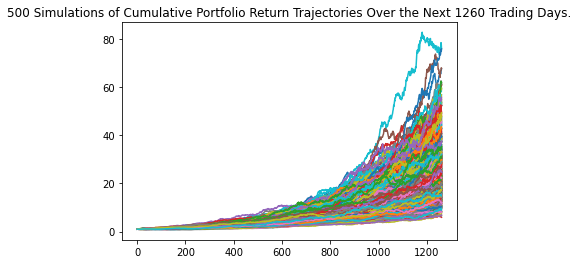

In [26]:
# Plot simulation outcomes
line_plot = MC_five.plot_simulation()

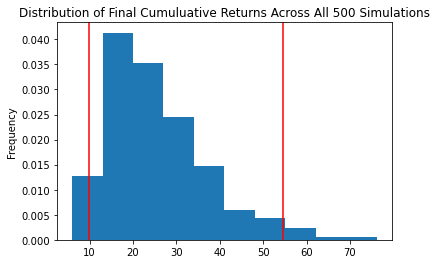

In [27]:
# Plot probability distribution and confidence intervals!
dist_plot = MC_five.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five= MC_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean             25.596242
std              11.758768
min               5.952406
25%              17.300328
50%              22.997979
75%              31.756684
max              76.117787
95% CI Lower      9.809722
95% CI Upper     54.619081
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_high = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes if the initial investment is $60,000
even_ci_lower_five = round(even_tbl_five[8]*initial_investment_high,2)
even_ci_upper_five = round(even_tbl_five[9]*initial_investment_high,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_high} in the portfolio")
print (f"over the next 5 years will end within in the range of")      
print (f"${even_ci_lower_five} and ${even_ci_upper_five}")      

There is a 95% chance that an initial investment of $60000 in the portfolio
over the next 5 years will end within in the range of
$588583.29 and $3277144.88


# Ten Years Retirement with Significantly Larger Initial Investment 60k

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.975153,0.994999,0.994947,1.016473,1.008178,1.007670,0.992844,1.022750,1.012824,1.010006,...,1.006585,0.994118,1.017962,1.000924,0.989260,0.982323,1.025435,1.005961,0.993243,0.994237
2,0.983365,0.997591,1.001068,1.014763,1.040091,0.993140,0.967144,1.031955,1.024592,1.019686,...,1.003746,0.994618,1.019360,1.004831,1.000093,0.992855,0.996339,0.985963,1.009700,0.983563
3,0.992041,1.009087,1.017337,1.016060,1.028698,1.000606,0.960224,1.026449,1.004987,1.015788,...,0.997049,1.016318,1.024226,1.009163,0.995408,0.985570,1.010949,0.974783,1.012386,0.991316
4,1.008063,1.013616,1.022261,1.016477,1.047187,1.001875,0.950584,1.020217,1.024459,1.020232,...,0.992138,1.018771,1.029418,0.993981,0.999650,1.003768,1.012034,0.960284,1.016969,1.010720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,375.758191,502.157818,512.352199,236.221148,250.514250,768.355247,225.202517,1493.370549,487.513968,225.181693,...,744.592401,686.020549,321.771912,615.405864,345.001036,886.368864,836.604685,169.712073,691.321159,561.447581
2517,384.281075,503.765079,513.937717,233.426909,253.229648,773.434220,227.400257,1521.576711,482.629745,227.126391,...,743.649012,682.886718,319.925931,616.804164,350.066066,886.640188,820.491803,166.349410,689.643128,569.935460
2518,386.264774,505.001134,512.558012,231.283094,250.234035,769.469451,231.074982,1491.504514,485.364952,232.257664,...,754.996846,699.528829,321.443380,622.773321,355.000545,877.677855,838.962561,165.008819,707.054956,572.249558
2519,391.828266,515.967660,518.679440,233.821584,249.935487,770.061590,231.153881,1507.942371,490.175063,232.879460,...,751.727728,692.704917,323.866119,619.931636,357.436278,871.523778,838.199495,165.474599,705.342493,565.504487


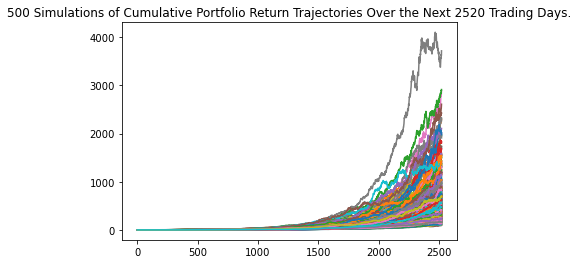

In [32]:
# Plot simulation outcomes
line_plot = MC_ten.plot_simulation()

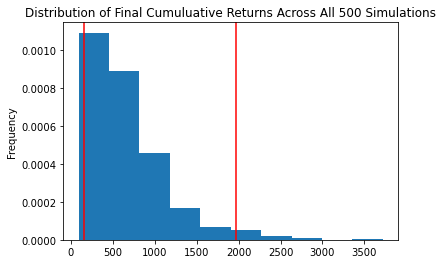

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten= MC_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count            500.000000
mean             675.248487
std              467.791239
min               95.185520
25%              362.926326
50%              558.172614
75%              848.683497
max             3719.362720
95% CI Lower     155.403033
95% CI Upper    1969.625783
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_high = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_lower_ten = round(even_tbl_ten[8]*initial_investment_high,2)
even_ci_upper_ten = round(even_tbl_ten[9]*initial_investment_high,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_high} in the portfolio")
print (f"over the next 10 years will end within in the range of")      
print (f"${even_ci_lower_ten} and ${even_ci_upper_ten}")   

There is a 95% chance that an initial investment of $60000 in the portfolio
over the next 10 years will end within in the range of
$9324181.95 and $118177547.01
